In [2]:
import defSim as ds
import networkx as nx
import warnings
import random
import numpy as np
import pickle

from TurnerSmaldinoFunctions import RandomContinuousScaledInitializer, ExtremeScaledInitializer, FlacheMacyInfluence, SimulationWithNewTies, PolarizationReporter


import matplotlib as mpl           # creates graphs and plots
import matplotlib.pyplot as plt    # creates graphs and plots
plt.style.use('grayscale')
import seaborn as sns              # creates graphs and plots
import pandas as pd

In [3]:
network_ts = 'connected_caveman_graph'
l_ts = 20  # 20 caves
k_ts = 5  # 5 agents/cave
focal_agent_ts = ds.RandomSelector()
neighbor_selector = ds.RandomNeighborSelector()

***Model run below***

In [110]:
sim = SimulationWithNewTies(
    topology = "complete_graph",
    attributes_initializer = ExtremeScaledInitializer(num_features = 1, scaling_factor = 0.98), 
    focal_agent_selector = focal_agent_ts,
    neighbor_selector = neighbor_selector, 
    communication_regime = 'one-to-one',
    influence_function = FlacheMacyInfluence(regime = "one-to-one", modifiers = ['stubborn', "all_states", "noise_all_features"], noise_strength = 0.2),
    dissimilarity_measure = ds.ManhattanDistance(),
    stop_condition = 'max_iteration',
    max_iterations = 100000,
    output_realizations = ['Basic', PolarizationReporter],
    tickwise = ['f01'],
    parameter_dict = {
        'n': 100,
        'l': l_ts,
        'k': k_ts,
        'allow_negative_weights': False, 
        'new_ties_probability' : 0.003,
        'new_ties_in_iteration' : 20000,
        #'initialize_uncertainty': True
    }
)
sim.run_simulation()

/home/dieko/Documents/ToRealSim/TSvsDF/TurnerSmaldinoFunctions.py:70: UserWarning: Uncertainty not specified, using 1 as default
  warnings.warn("Uncertainty not specified, using 1 as default")
/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/Simulation.py:248: FutureWarning: Simulation.initialize_simulation() is replaced by Simulation.initialize() and will be deprecated at or before defSim v1.0.0
  warnings.warn(
/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/Simulation.py:300: FutureWarning: Simulation.run_simulation_step() is replaced by Simulation.run_step() and will be deprecated at or before defSim v1.0.0
  warnings.warn(
/home/dieko/Documents/ToRealSim/TSvsDF/TurnerSmaldinoFunctions.py:169: UserWarning: Influenced features == ['f01']
  warnings.warn("Influenced features == {}".format(influenced_features))
/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/network_evolution_sim/NewTiesModifier.py:35: UserWarning: No Numpy G

,Seed,Ticks,SuccessfulInfluence,Topology,n,l,k,allow_negative_weights,new_ties_probability,new_ties_in_iteration,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization,Tickwise_f01
0,82185,100000,49964,complete_graph,100,20,5,False,0.003,20000,Generator(PCG64),5,1,0.87,0.090909,0.9,0.14876,"[[0.010000000000000009, 0.99, 0.01000000000000..."


In [111]:
def plot_by_color(network, feature = 'f01', title = None, pos = None):
    nodes = network.nodes()
    colors = [network.nodes[n][feature] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    plt.figure(1,figsize=(10,10))
    if pos is None:
        pos = nx.circular_layout(network)
    ec = nx.draw_networkx_edges(network, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(network, pos, nodelist=nodes, node_color=colors, 
                                node_size=100, cmap=plt.cm.winter,
                                vmin=0, vmax=1)
    
    if title is not None:
        plt.title(title)
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

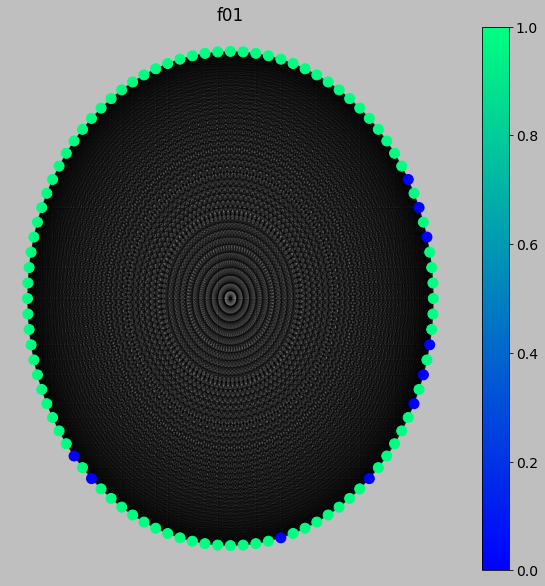

In [112]:
plot_by_color(sim.network, feature = 'f01', title = 'f01')

In [113]:
# function now as simple as possible, but can be expanded for more complex visualization
def plot_dynamics(feature):
    plt.plot(feature)

(0.0, 1.0)

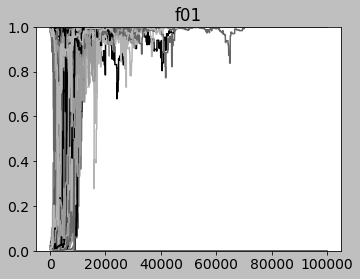

In [114]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()


plt.subplot(321, title='f01')
plot_dynamics(sim.return_values()['f01'][0])
plt.ylim(0,1)


***Experiment TS***

In [7]:
from defSim.extensions.tools.Plots import HeatMap
heatmap = HeatMap(vmin=0, vmax=0.25)

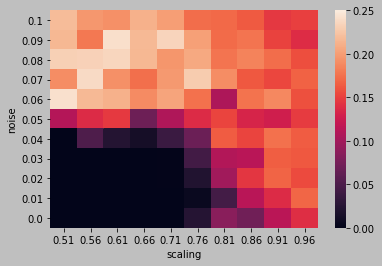

In [6]:
data = pickle.load(open('results_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

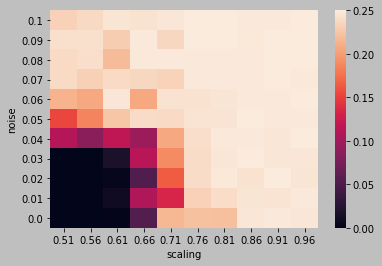

In [7]:
data = pickle.load(open('results_ts_1feature.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

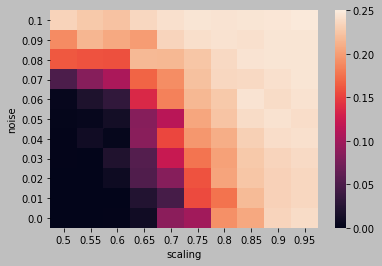

In [8]:
data = pickle.load(open('results_TEST_1to1_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

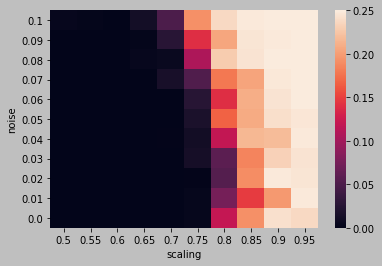

In [9]:
data = pickle.load(open('results_TEST_1to1__complete_graph_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

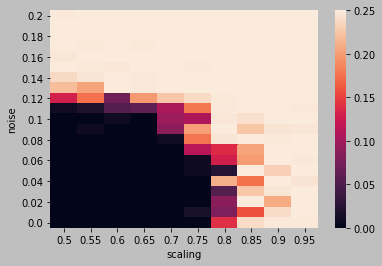

In [10]:
data = pickle.load(open('results_TEST_1to1__complete_graph__morenoise_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

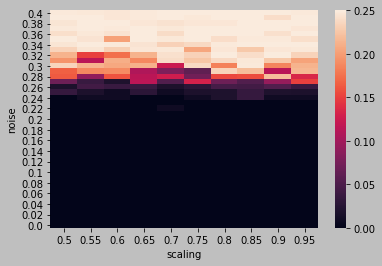

In [11]:
data = pickle.load(open('results_ts_1f_NoNeg.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

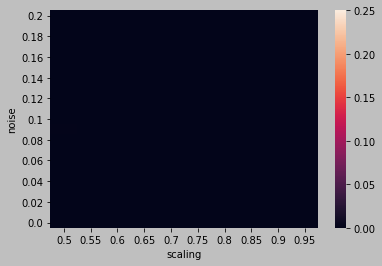

In [12]:
data = pickle.load(open('results_TEST_manyto1__complete_graph__morenoise__noneg_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

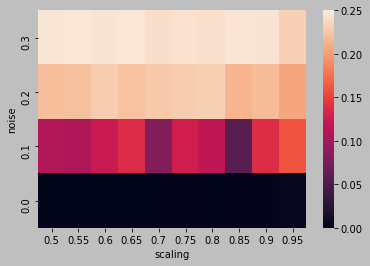

In [13]:
data = pickle.load(open('results_TEST_1to1__posOnly_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

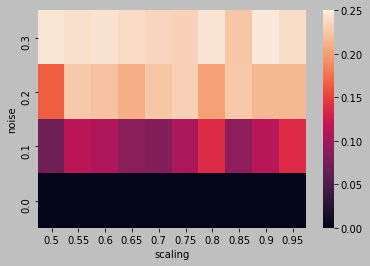

In [14]:
data = pickle.load(open('results_TEST_manyto1__posOnly_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

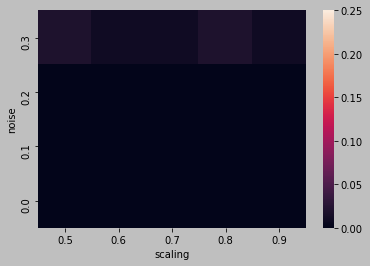

In [15]:
data = pickle.load(open('results_TEST_manyto1__posOnly_cg_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

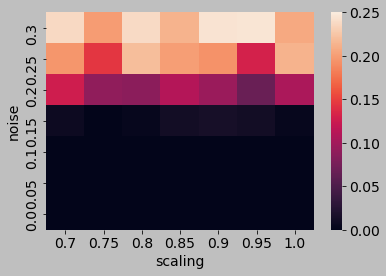

In [25]:
data = pickle.load(open('results_TEST_1to1__posOnly_cg_ts.pickledata', 'rb'))
data = data.loc[data['scaling']>= 0.50]
heatmap.plot(data, x='scaling', y='noise', hue='Polarization')

***Experiment TS setup with DF influence***

In [6]:
data = pickle.load(open('results_ts_withDFinf.pickledata', 'rb'))
data = data.groupby(['scaling', 'noise']).mean().reset_index()
data = data.pivot("noise","scaling", "Polarization" ).sort_values("noise", ascending = False)
ax = sns.heatmap(data)

FileNotFoundError: [Errno 2] No such file or directory: 'results_ts_withDFinf.pickledata'

***Example simulation TS with DF influence***

In [12]:
from DeffuantFunctions import InitialExtremistInitializer, RelativeAgreement
sim_df = SimulationWithNewTies(
                topology = 'complete_graph', 
                attributes_initializer = InitialExtremistInitializer(proportion_extremists = 0.2, uncertainty_extremists = 0.005, uncertainty_moderates = 0.9), 
                focal_agent_selector = focal_agent_ts,
                neighbor_selector = neighbor_selector,
                influence_function = RelativeAgreement(convergence_rate = 0.3, noise = 0.3),
                stop_condition = 'max_iteration',
                max_iterations = 100000,
                communication_regime = 'one-to-one',
                parameter_dict = {
                    'new_ties_probability': 0.003,
                    'new_ties_in_iteration': 20000,
                    'output_step_size': 100,
                    'l': l_ts,
                    'k': k_ts,
                    'n': 400,
                    'p': 4/400,
                    'uncertainty_moderates': 0.6,
                    'proportion_extremists': 0.1,
                    'initialize_uncertainty': True
                },
                output_realizations = ['Basic', PolarizationReporter],
                tickwise = ['f01'],
            )
sim_df.run_simulation()

/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/agents_init/agents_init.py:165: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")
/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/network_evolution_sim/NewTiesModifier.py:35: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")


,Seed,Ticks,SuccessfulInfluence,Topology,new_ties_probability,new_ties_in_iteration,output_step_size,l,k,n,...,proportion_extremists,initialize_uncertainty,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization,Tickwise_f01
0,57776,100000,100000,complete_graph,0.0,20000,100,20,5,400,...,0.1,True,Generator(PCG64),400,400,0.0025,1.0,0.502037,0.003299,"[[0.9813091147244748, 0.0762478576091088, 0.29..."


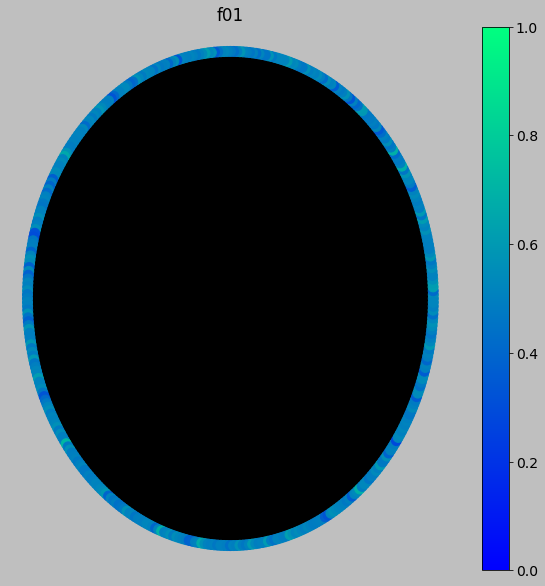

In [13]:
plot_by_color(sim_df.network, feature = 'f01', title = 'f01')

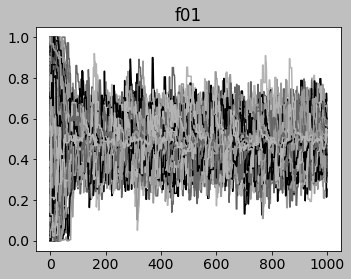

In [14]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()

plt.subplot(321, title='f01')
plot_dynamics(sim_df.return_values()['f01'][0])


***Experiment TS with DF influence + extremist initializer, no scaling, varied prop extremists***
Uncertainty extremists 0.005, uncertainty moderates 0.6

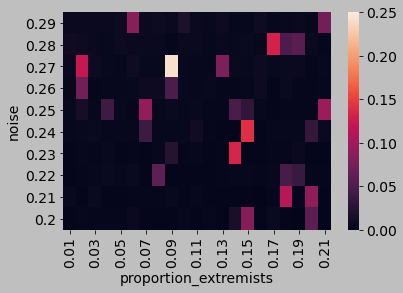

In [8]:
data = pickle.load(open('results_ts_withDFinf_propextr.pickledata', 'rb'))
data = data.groupby(['proportion_extremists', 'noise']).mean().reset_index()
data = data.pivot("noise","proportion_extremists", "Polarization" ).sort_values("noise", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

***Experiment TS with DF influence + extremist initializer, no scaling, varied uncertainty moderates***
Uncertainty extremists 0.005, proportion extremists 0.1

In [9]:
data = pickle.load(open('results_ts_withDFinf_uncmod.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'noise']).mean().reset_index()
data = data.pivot("noise","uncertainty_moderates", "Polarization" ).sort_values("noise", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

FileNotFoundError: [Errno 2] No such file or directory: 'results_ts_withDFinf_uncmod.pickledata'

***Experiment TS with DF influence + extremist initializer, no scaling, varied uncertainty moderates and proportion extremists***
Noise 0.3

In [37]:
data = pickle.load(open('results_ts_withDFinf_uncmod_propextr.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'proportion_extremists']).mean().reset_index()
data = data.pivot("proportion_extremists","uncertainty_moderates", "Polarization" ).sort_values("proportion_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

FileNotFoundError: [Errno 2] No such file or directory: 'results_ts_withDFinf_uncmod_propextr.pickledata'

***Simulation without influence***

In [10]:
sim = SimulationWithNewTies(
    topology = network_ts,
    attributes_initializer = RandomContinuousScaledInitializer(num_features = 1, scaling_factor = 0.5), 
    focal_agent_selector = focal_agent_ts,
    neighbor_selector = neighbor_selector, 
    communication_regime = 'one-to-one',
    influence_function = FlacheMacyInfluence(regime = "one-to-one", modifiers = ['stubborn', "influence_off", "noise_all_features"], noise_strength = 0.1),
    dissimilarity_measure = ds.ManhattanDistance(),
    stop_condition = 'max_iteration',
    max_iterations = 1000000,
    output_realizations = ['Basic', PolarizationReporter],
    tickwise = ['f01'],
    parameter_dict = {
        'l': l_ts,
        'k': k_ts,
        'output_step_size': 1000,
        'allow_negative_weights': True, 
        'new_ties_probability' : 0.003,
        'new_ties_in_iteration' : 0,
        #'initialize_uncertainty': True
    }
)
sim.run_simulation()

/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/agents_init/agents_init.py:165: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")
/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/network_evolution_sim/NewTiesModifier.py:35: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")
/home/dieko/Documents/ToRealSim/TSvsDF/TurnerSmaldinoFunctions.py:106: UserWarning: Applying noise to all features, but only one feature updated each step
  warnings.warn("Applying noise to all features, but only one feature updated each step")
/home/dieko/Documents/ToRealSim/TSvsDF/TurnerSmaldinoFunctions.py:119: UserWarning: Influenced features == ['f01']
  warnings.warn("Influenced features == {}".format(influenced_features))


,Seed,Ticks,SuccessfulInfluence,Topology,l,k,output_step_size,allow_negative_weights,new_ties_probability,new_ties_in_iteration,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization,Tickwise_f01
0,57557,1000000,499972,connected_caveman_graph,20,5,1000,True,0.003,0,Generator(PCG64),100,1,0.01,0.480172,0.509998,0.249965,"[[0.37274600202785063, 0.6694855481553057, 0.4..."


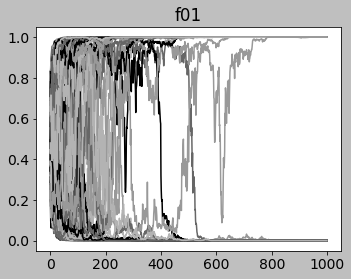

In [11]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()

plt.subplot(321, title='f01')
plot_dynamics(sim.return_values()['f01'][0])


In [52]:
sim = ds.Simulation(
    topology = 'complete_graph', 
    attributes_initializer = RandomContinuousScaledInitializer(num_features = 1, scaling_factor = 1), 
    focal_agent_selector = focal_agent_ts,
    neighbor_selector = neighbor_selector,
    influence_function = FlacheMacyInfluence(regime = 'one-to-one', modifiers = ['stubborn', "all_states", "noise_all_features"], noise_strength = 0),
    dissimilarity_measure = ds.ManhattanDistance(),
    stop_condition = 'max_iteration',
    max_iterations = 100000,
    communication_regime = 'one-to-one',
    tickwise = ['f01'],
    parameter_dict = {
        'allow_negative_weights': False,
        'output_step_size': 100,
        'n': 100,
    },
    output_realizations = [PolarizationReporter()],
    #tickwise = [PolarizationReporter()]
)
sim.initialize_simulation()
for agent in sim.network.nodes:
    if random.random() < 0.8:
        sim.network.nodes[agent]['f01'] = random.choice([0, 1])
sim.run_simulation(initialize = False)

/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/agents_init/agents_init.py:165: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")
/home/dieko/Documents/ToRealSim/TSvsDF/TurnerSmaldinoFunctions.py:119: UserWarning: Influenced features == ['f01']
  # NOTE: because defSim assumes undirected networks, and distance is an edge


,Seed,Ticks,SuccessfulInfluence,Topology,allow_negative_weights,output_step_size,n,np_random_generator,Polarization,Tickwise_f01
0,42238,100000,50103,complete_graph,False,100,100,Generator(PCG64),0.24012,"[[1, 1, 0, 0, 0.9623998152415824, 0, 0, 0, 0.7..."


(0.0, 1.0)

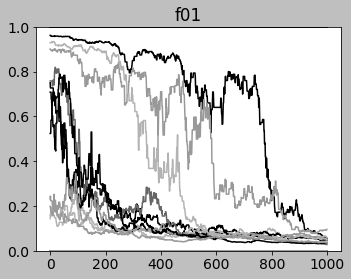

In [53]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()

plt.subplot(321, title='f01')
plot_dynamics(sim.return_values()['f01'][0])
plt.ylim(0,1)